In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#removed the Cabin column since it had too many nulls and didn't have much impact then removed the nulled records
train_data = train_data.drop(["Cabin"],axis=1).dropna(axis=0)
test_data = test_data.drop(["Cabin"],axis=1).dropna(axis=0)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [6]:
train_data= train_data.join(pd.get_dummies(train_data.Sex, dtype=int)).drop(["Sex"], axis= 1)
train_data= train_data.join(pd.get_dummies(train_data.Embarked, dtype=int)).drop(["Embarked"], axis= 1)
train_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,1,0,0,1,0
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0


In [7]:
train_data.drop(["Name"], axis=1, inplace = True)
train_data.drop(["Ticket"], axis=1, inplace = True)
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,1,0,0,1,0
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


<Axes: >

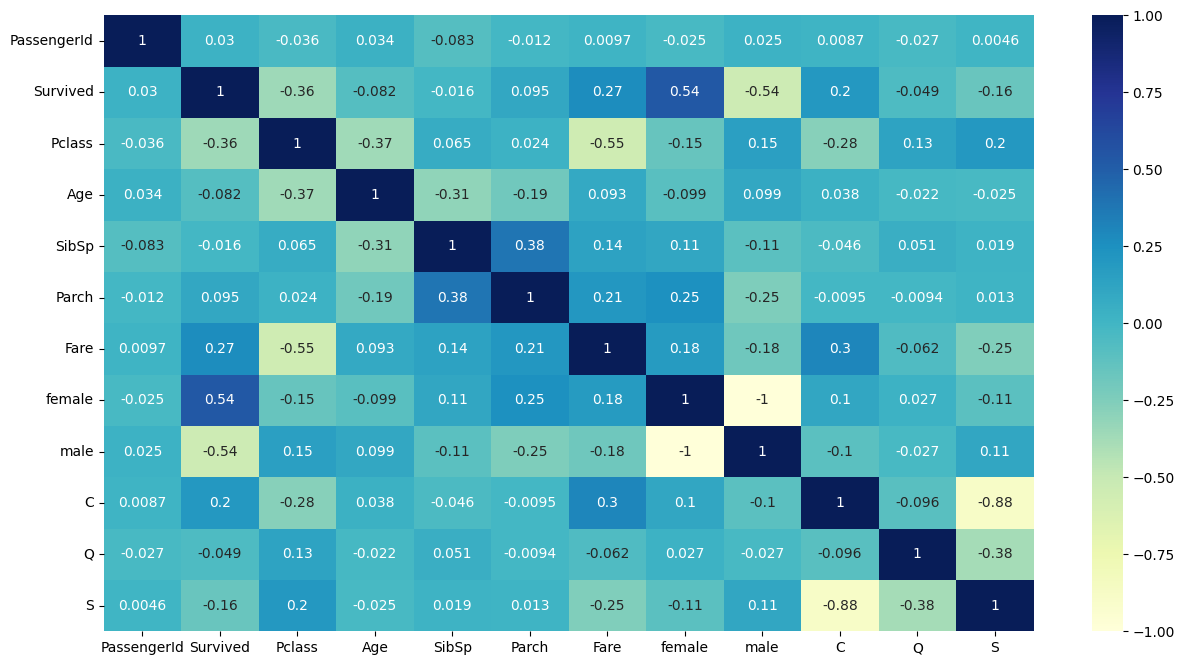

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap= "YlGnBu")

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'female'}>,
        <Axes: title={'center': 'male'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'Q'}>,
        <Axes: title={'center': 'S'}>]], dtype=object)

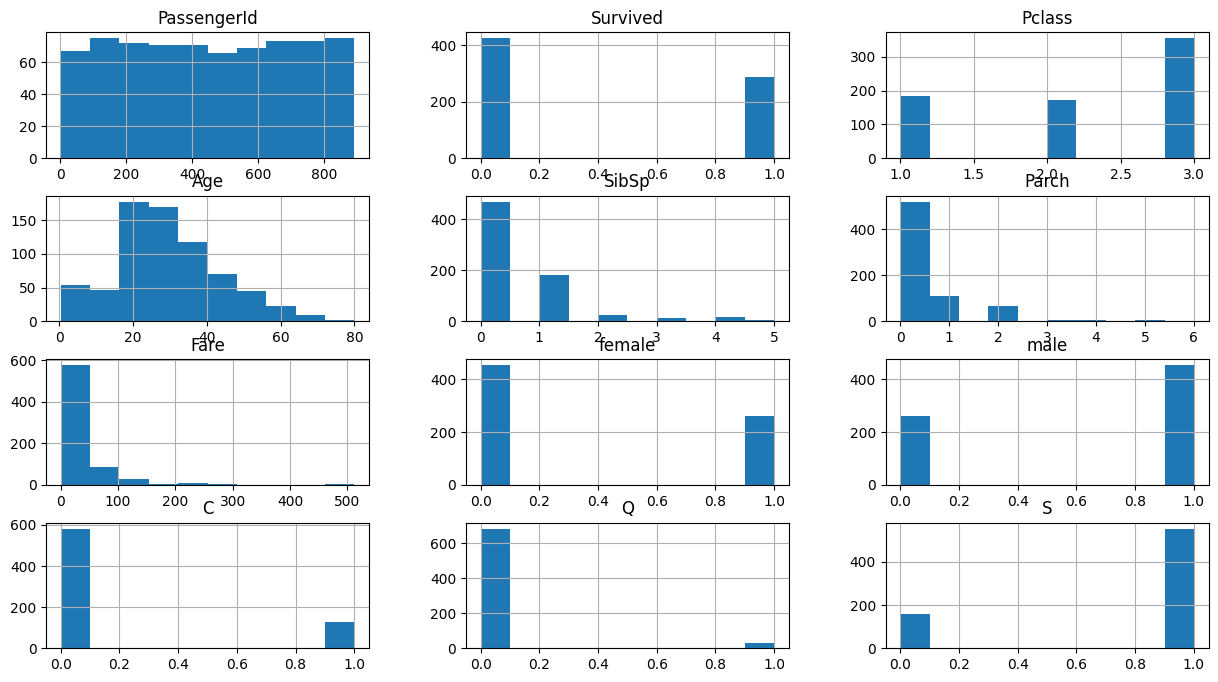

In [9]:
train_data.hist(figsize=(15,8))

In [10]:
test_data= test_data.join(pd.get_dummies(test_data.Sex, dtype=int)).drop(["Sex"], axis= 1)
test_data= test_data.join(pd.get_dummies(test_data.Embarked, dtype=int)).drop(["Embarked"], axis= 1)
test_data.drop(["Name"], axis=1, inplace = True)
test_data.drop(["Ticket"], axis=1, inplace = True)

In [11]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(["Survived"], axis=1), train_data["Survived"]

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
test_data["prediction"] = reg.predict(test_data).round().astype(int)
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,prediction
0,892,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,3.0,1,1,13.7750,1,0,0,0,1,1
411,1303,1,37.0,1,0,90.0000,1,0,0,1,0,1
412,1304,3,28.0,0,0,7.7750,1,0,0,0,1,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0,1


In [13]:
test_data.prediction.value_counts()

prediction
0    192
1    139
Name: count, dtype: int64

In [14]:
train_data.Survived.value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

In [15]:
#testing if passengerID is noise
test_data.drop(["PassengerId"], axis=1, inplace = True)
train_data.drop(["PassengerId"], axis=1, inplace = True)

x_train, y_train = train_data.drop(["Survived"], axis=1), train_data["Survived"]

reg = LinearRegression()
reg.fit(x_train,y_train)

test_data.drop(["prediction"],axis= 1,inplace=True)
test_data["prediction"] = reg.predict(test_data).round().astype(int)
test_data
test_data.prediction.value_counts()

prediction
0    198
1    133
Name: count, dtype: int64